In [ ]:
# Cell 1: Imports & load
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Load the dataset
df = pd.read_csv('train.csv')
y = df.pop('Credit_Score')  # target variable

In [ ]:
df = pd.read_csv('preprocessed_dataset_for_viz.csv')

In [ ]:
df = pd.read_csv('preprocessed_dataset_for_viz.csv')
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_in_months
0,0x1602,CUS_0xd40,january,Aaron Maashoh,23,821-00-0265,scientist,19114.12,1824.843333,3,...,809.98,26.822620,22 Years and 1 Months,no,49.574949,80.415295,highspentsmallvaluepayments,312.494089,Good,265
1,0x1603,CUS_0xd40,february,Aaron Maashoh,23,821-00-0265,scientist,19114.12,1824.843333,3,...,809.98,31.944960,NaN,no,49.574949,118.280222,lowspentlargevaluepayments,284.629163,Good,265
2,0x1604,CUS_0xd40,march,Aaron Maashoh,23,821-00-0265,scientist,19114.12,1824.843333,3,...,809.98,28.609352,22 Years and 3 Months,no,49.574949,81.699521,lowspentmediumvaluepayments,331.209863,Good,267
3,0x1605,CUS_0xd40,april,Aaron Maashoh,23,821-00-0265,scientist,19114.12,1824.843333,3,...,809.98,31.377862,22 Years and 4 Months,no,49.574949,199.458074,lowspentsmallvaluepayments,223.451310,Good,268
4,0x1606,CUS_0xd40,may,Aaron Maashoh,23,821-00-0265,scientist,19114.12,1824.843333,3,...,809.98,24.797347,22 Years and 5 Months,no,49.574949,41.420153,highspentmediumvaluepayments,341.489231,Good,269


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ID                            100000 non-null  object 
 1   Customer_ID                   100000 non-null  object 
 2   Month                         100000 non-null  object 
 3   Name                          90015 non-null   object 
 4   Age                           100000 non-null  int64  
 5   SSN                           100000 non-null  object 
 6   Occupation                    100000 non-null  object 
 7   Annual_Income                 100000 non-null  float64
 8   Monthly_Inhand_Salary         100000 non-null  float64
 9   Num_Bank_Accounts             100000 non-null  int64  
 10  Num_Credit_Card               100000 non-null  int64  
 11  Interest_Rate                 100000 non-null  int64  
 12  Num_of_Loan                   100000 non-null

In [ ]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_in_months
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.289050,48300.509119,4002.970346,5.364470,5.527890,14.510400,3.528980,20.197280,13.292220,10.372385,5.765490,1251.272653,32.285173,93.793870,200.627048,342.517575,214.971690
std,10.765342,35123.910078,2906.446514,2.593164,2.067096,8.738914,2.445351,13.764476,6.263598,6.530515,3.860705,917.060646,5.116875,101.166192,776.175570,145.627618,100.067005
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760,1.000000
25%,24.000000,19199.490000,1613.148333,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,5.330000,3.000000,537.450000,28.052567,27.980835,56.912058,254.110910,136.000000
50%,33.000000,36377.090000,3038.506667,5.000000,5.000000,13.000000,3.000000,17.000000,14.000000,9.380000,5.000000,1096.330000,32.305784,63.486966,105.013505,314.556044,213.000000
75%,42.000000,69707.310000,5785.247500,7.000000,7.000000,20.000000,5.000000,27.000000,18.000000,14.730000,8.000000,1685.120000,36.496663,135.018683,189.346924,414.606386,294.000000
max,56.000000,152574.760000,14739.416670,11.000000,11.000000,34.000000,9.000000,62.000000,28.000000,29.980000,17.000000,4014.350000,50.000000,1779.103254,10000.000000,770.625765,404.000000


In [ ]:
df.shape

(100000, 29)

In [ ]:
df.columns          

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Credit_History_Age_in_months'],
      dtype='object')

In [ ]:
#df.drop(['ID', 'Customer_ID', 'Name', 'SSN'], axis=1, inplace=True)


In [ ]:
encoding_map = {'Poor': 1, 'Standard': 2, 'Good': 3}
df['Credit_Score2'] = df['Credit_Score'].map(encoding_map)

In [ ]:
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns

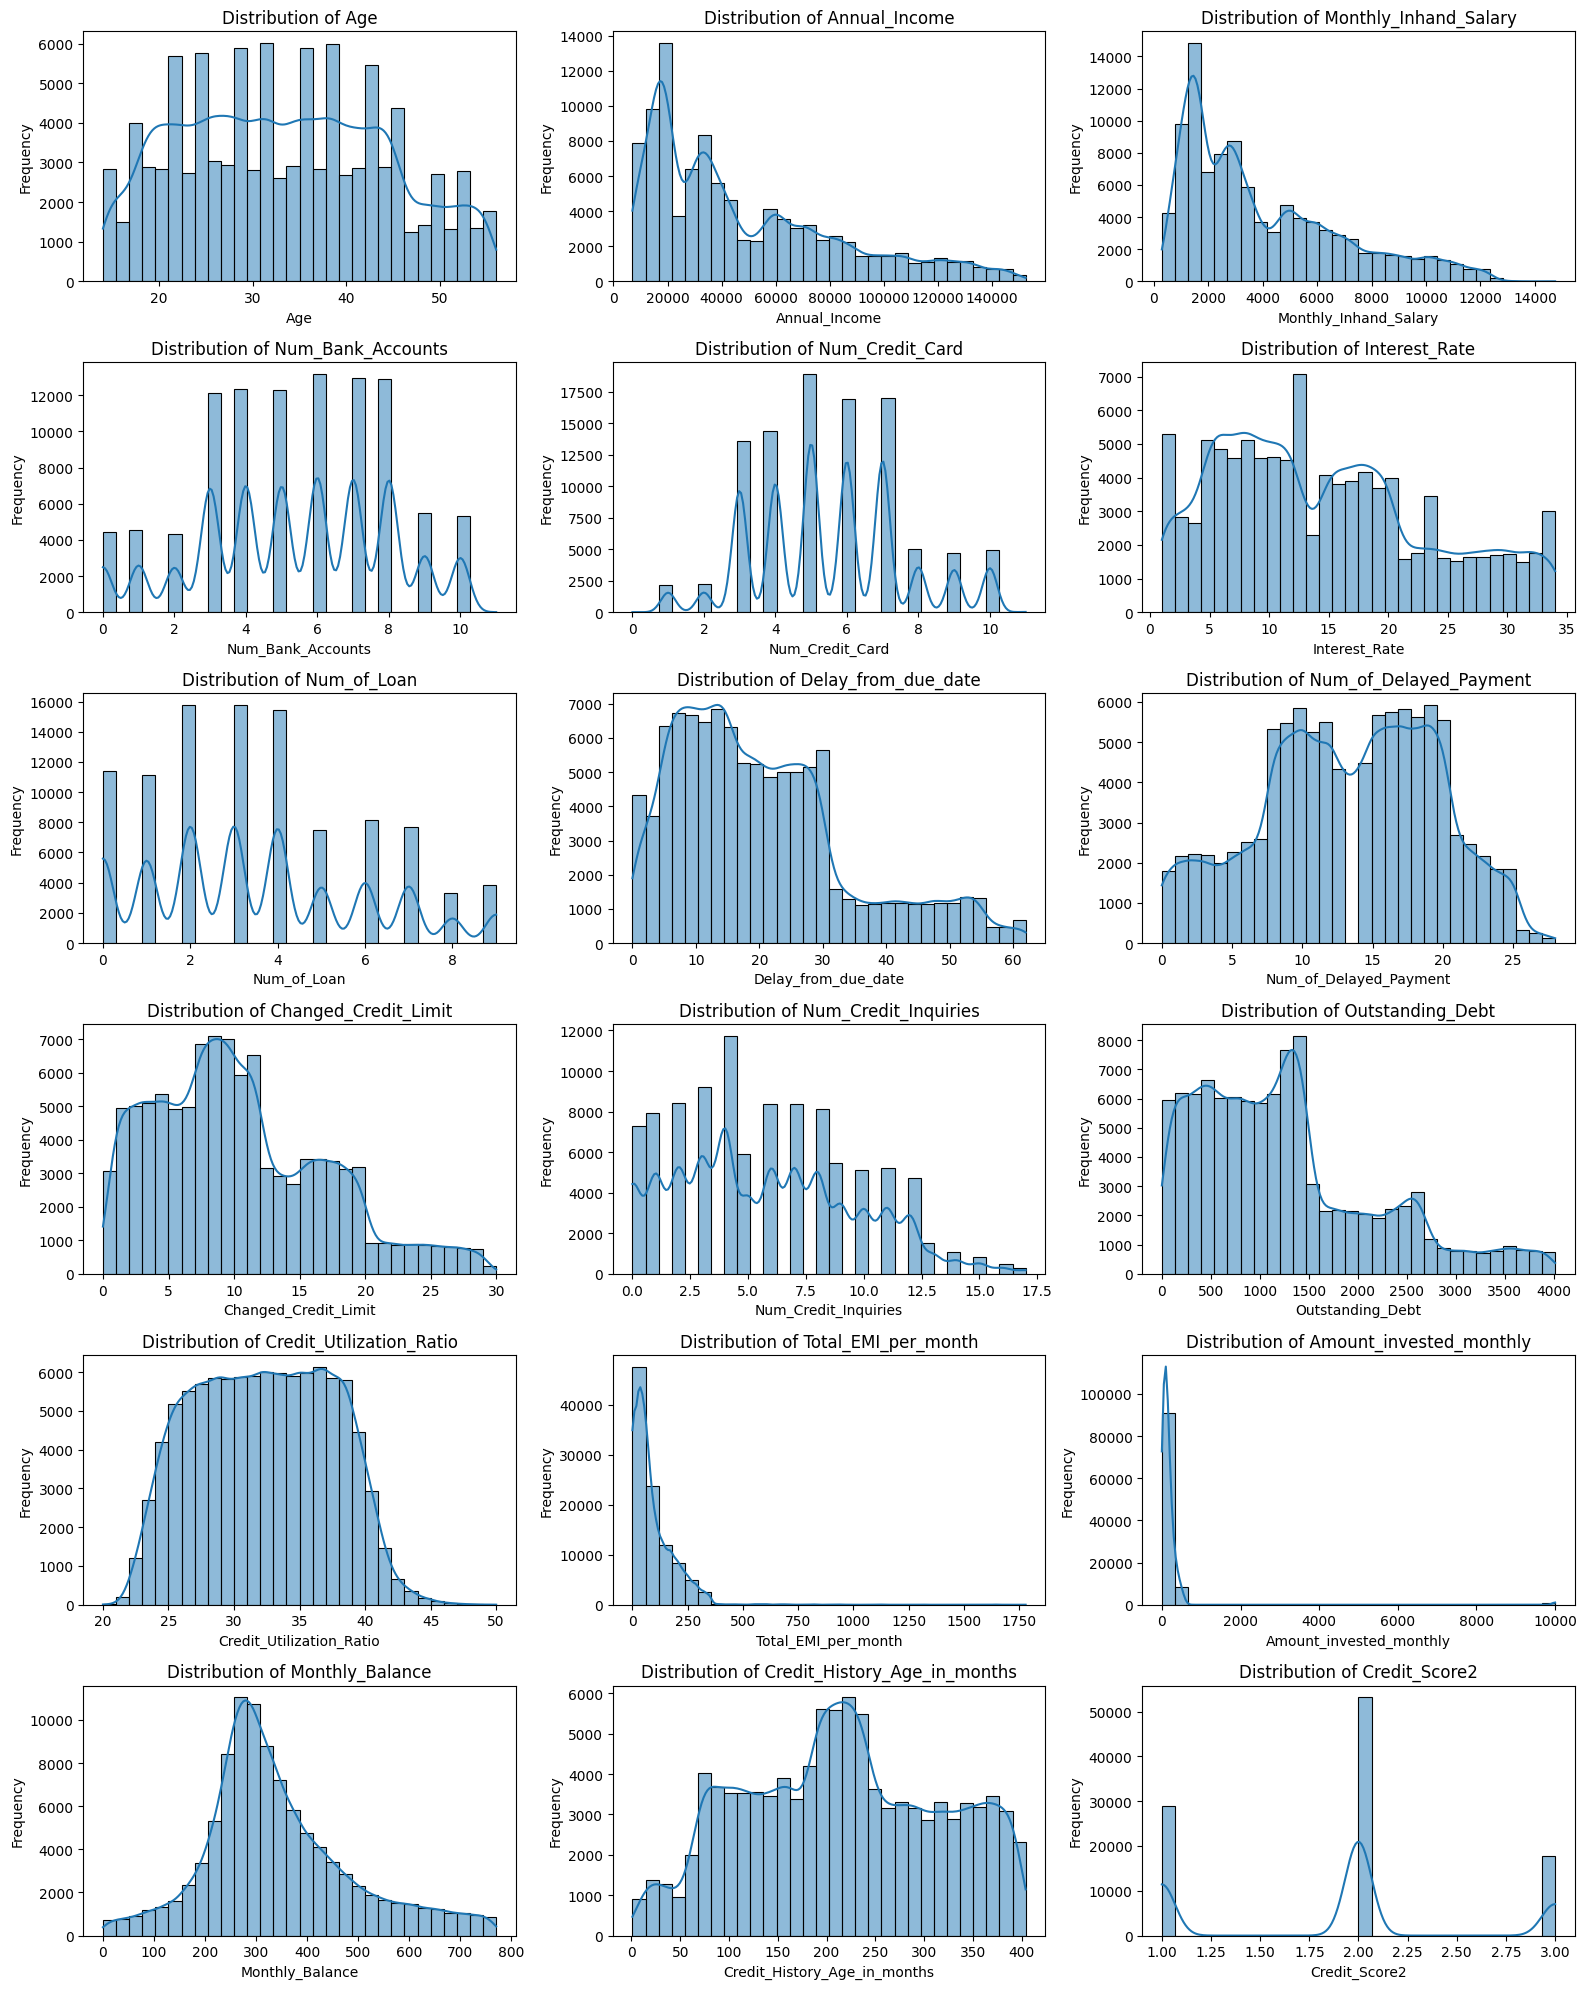

In [ ]:
plt.figure(figsize=(16, 20))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(6, 3, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
unique_ages = df['Age'].unique()
unique_ages

array([23, 28, 34, 54, 55, 21, 31, 33, 30, 24, 44, 45, 40, 41, 32, 35, 36,
       39, 37, 20, 46, 26, 42, 19, 48, 38, 43, 22, 16, 18, 15, 27, 25, 14,
       17, 47, 53, 56, 29, 49, 51, 50, 52], dtype=int64)

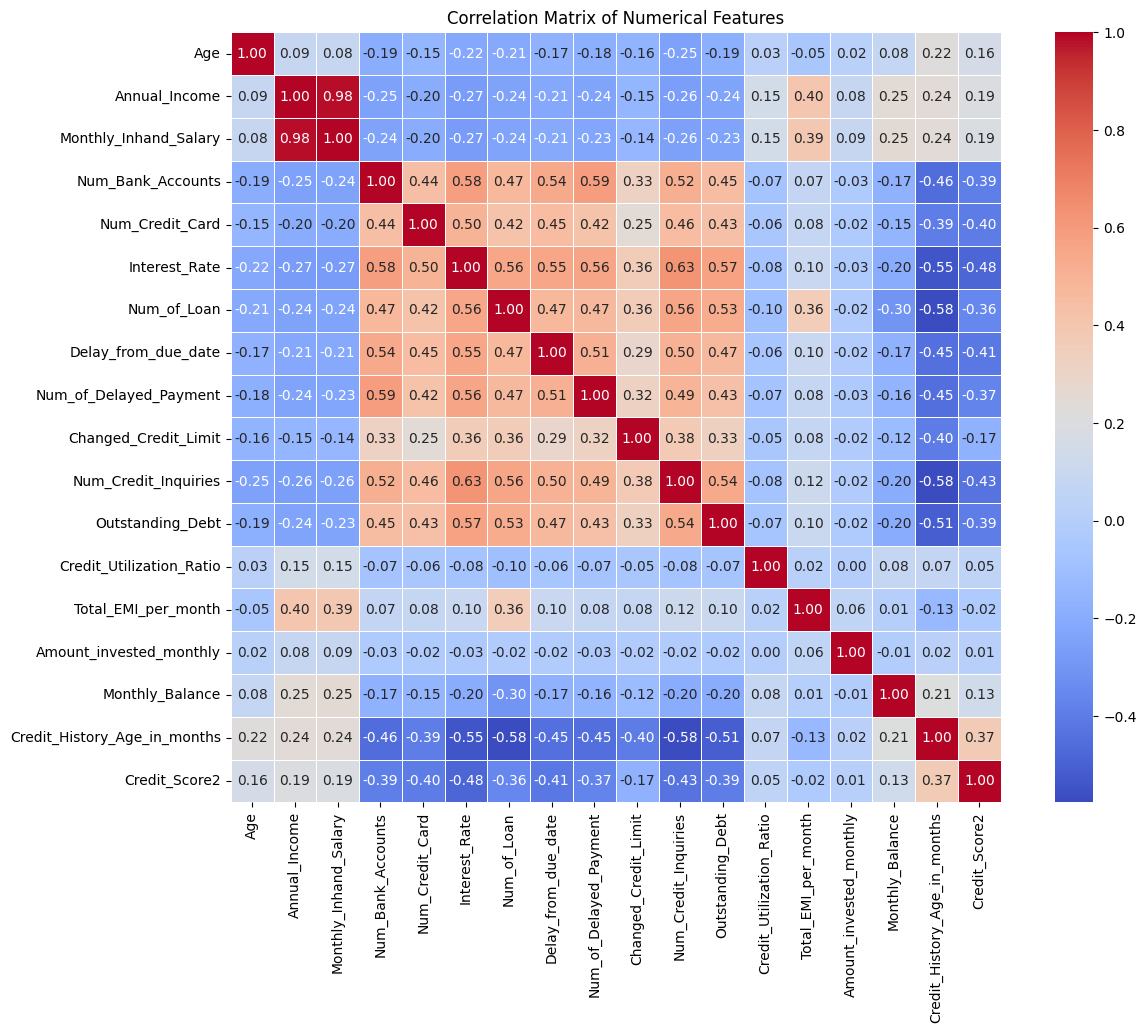

In [ ]:
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

Annual_Income & Monthly_Inhand_Salary: Correlation = 0.98
Strong positive correlation; makes sense since monthly salary is typically derived from annual income.

Credit_History_Age_in_months ↔ Credit_Score (0.37)
Moderate positive correlation: it reflects a person’s ability to manage credit over an extended period. Credit bureaus favor individuals who have maintained accounts for many years without defaults or significant issues, as this indicates reliability and financial discipline

Interest_Rate ↔ Credit_Score (-0.48)
Moderate negative correlation between interest rates and credit scores, as individuals with lower credit scores often receive higher interest rates. This occurs because lenders view them as higher risk due to past behaviors like missed payments or high debt levels. To compensate for this risk, lenders increase the interest charged, which in turn can make repayment more difficult and potentially further damage the borrower’s credit score.

Num_of_Loan ↔ Credit_Score (-0.36)
A higher number of loans is moderately linked to lower credit scores, suggesting that individuals with many loans may be perceived as financially overextended. Managing multiple loan repayments increases the chance of missed or late payments, which negatively impacts credit scores.

Outstanding_Debt ↔ Credit_Score (-0.39)
Outstanding debt shows a moderate negative correlation with credit score, as individuals carrying high levels of debt are typically seen as higher risk.

Num_Bank_Accounts & Num_Credit_Card: Correlation = 0.44
Moderate correlation suggesting users with more bank accounts tend to also have more credit cards.

Interest_Rate & Num_Credit_Inquiries: Correlation = 0.63 /////////////////////////
Suggests more credit inquiries are associated with higher interest rates, possibly due to perceived credit risk.






In [ ]:
variances = df[numeric_columns].var()


In [ ]:
variances

Age                             1.158926e+02
Annual_Income                   1.233689e+09
Monthly_Inhand_Salary           8.447431e+06
Num_Bank_Accounts               6.724499e+00
Num_Credit_Card                 4.272885e+00
Interest_Rate                   7.636862e+01
Num_of_Loan                     5.979740e+00
Delay_from_due_date             1.894608e+02
Num_of_Delayed_Payment          3.923266e+01
Changed_Credit_Limit            4.264763e+01
Num_Credit_Inquiries            1.490504e+01
Outstanding_Debt                8.410002e+05
Credit_Utilization_Ratio        2.618241e+01
Total_EMI_per_month             1.023460e+04
Amount_invested_monthly         6.024485e+05
Monthly_Balance                 2.120740e+04
Credit_History_Age_in_months    1.001341e+04
Credit_Score2                   4.557877e-01
dtype: float64

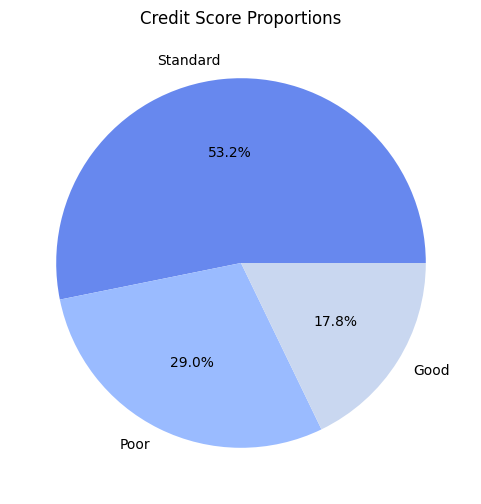

In [ ]:
sns.set_palette("coolwarm")
plt.figure(figsize=(6, 6))
df['Credit_Score'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Credit Score Proportions')
plt.ylabel('')
plt.show()

The pie chart illustrates the distribution of credit scores in the dataset. A majority of instances fall under the 'Standard' category (53.2%), while 'Poor' and especially 'Good' are significantly less represented. This imbalance indicates that the dataset is skewed toward the 'Standard' class, which may affect the performance of machine learning models, especially in correctly predicting minority classes.

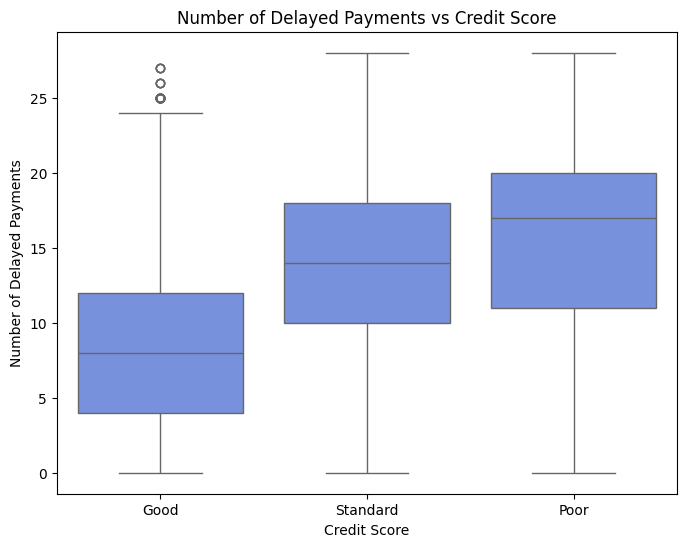

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Credit_Score', y='Num_of_Delayed_Payment', data=df)

plt.title('Number of Delayed Payments vs Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Number of Delayed Payments')
plt.show()

This boxplot clearly shows that an increase in the number of delayed payments tends to correlate with a poorer credit score. Individuals with good credit scores typically have fewer late payments, while those with standard or poor scores have more frequent and higher numbers of delays. This demonstrates the importance of timely payments in maintaining a healthy credit profile.

In [ ]:
unique_customers = df.drop_duplicates(subset="Customer_ID")

C:\Users\omart\AppData\Local\Temp\ipykernel_17160\3156356922.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


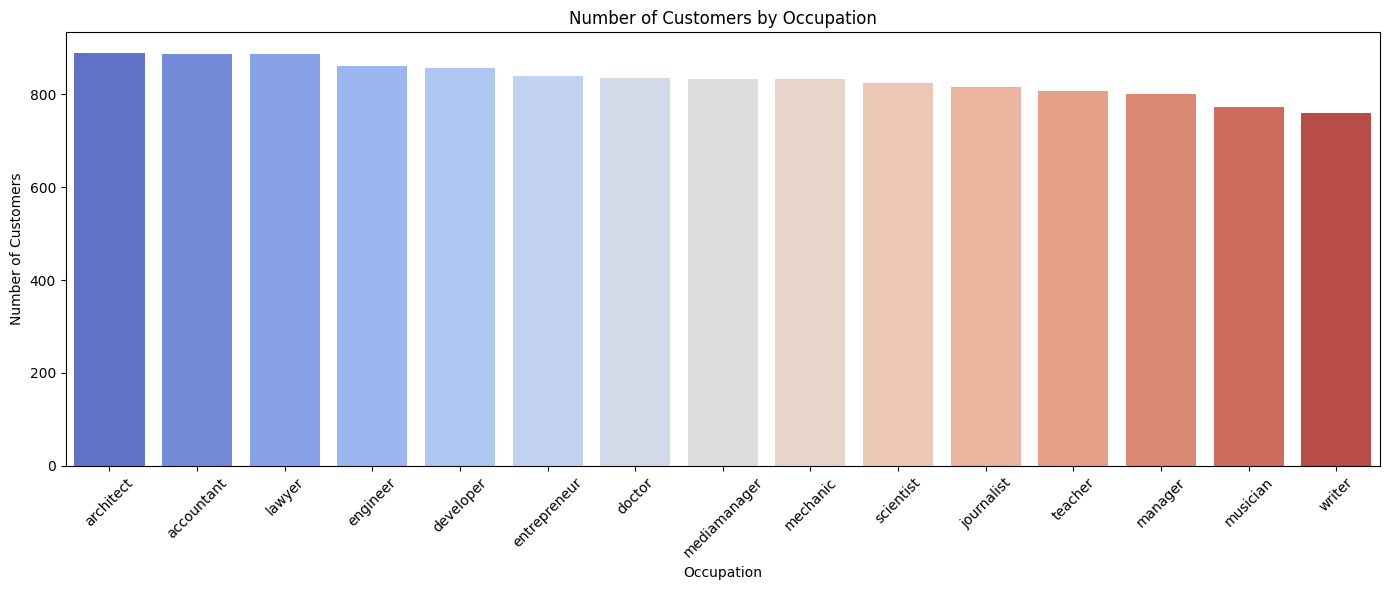

In [ ]:
occupation_order = unique_customers['Occupation'].value_counts().index
counts = unique_customers['Occupation'].value_counts()

plt.figure(figsize=(14, 6))
sns.barplot(
    x=counts.index,
    y=counts.values,
    palette='coolwarm' 
)

plt.title('Number of Customers by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar chart displays the number of customers by occupation. It is evident that  architects, accountants, and lawyers make up the largest customer group at the bank.

1. This insight suggests a valuable opportunity — by tailoring financial services, offers, or loyalty programs specifically for architects, accountants and lawyers.

2. Create targeted campaigns for less-represented jobs (like musicians or writers) to attract new customers.

In [ ]:
occupation_counts = unique_customers['Occupation'].value_counts()
print(occupation_counts)

Occupation
architect       889
accountant      887
lawyer          886
engineer        860
developer       857
entrepreneur    840
doctor          835
mediamanager    832
mechanic        832
scientist       824
journalist      816
teacher         808
manager         801
musician        773
writer          760
Name: count, dtype: int64


C:\Users\omart\AppData\Local\Temp\ipykernel_17160\361524192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=unique_customers, y="Age", palette="Set3")


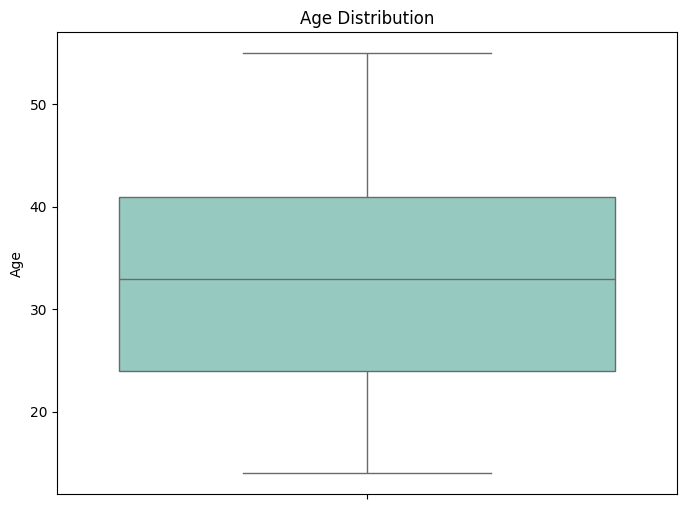

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=unique_customers, y="Age", palette="Set3")
plt.title("Age Distribution")
plt.show()

The box plot shows that the bank’s customers range in age from about 15 to 55, with most falling between their mid-20s and early 40s, and a median age around 33. This suggests that the customer base is relatively young and evenly distributed, with no extreme outliers.
from this, the bank can focus its services and marketing efforts on the 25–41 age group, such as offering tailored savings accounts, credit options,

And Develop youth programs or financial literacy campaigns to attract more from the lower end (ages 15–25).



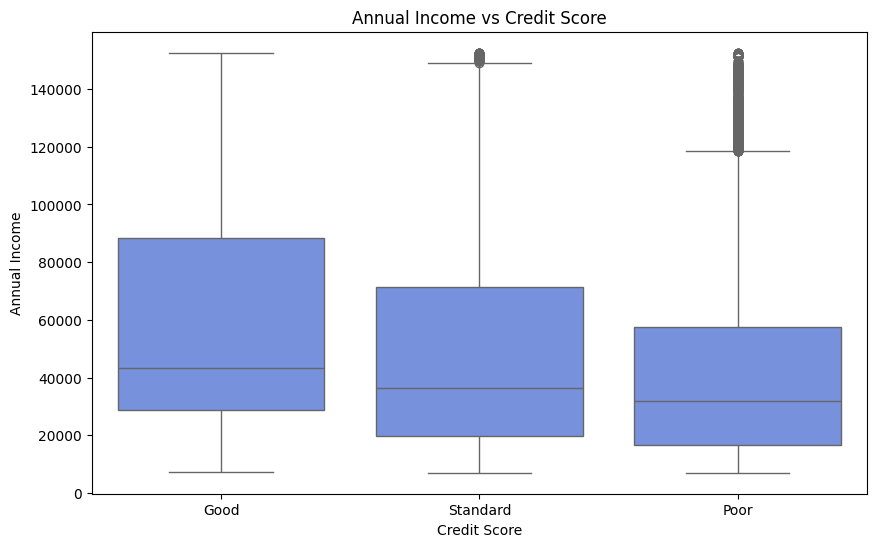

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_Score', y='Annual_Income', data=df)
plt.title('Annual Income vs Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Annual Income')
plt.show()

The box plot shows that customers with higher annual incomes tend to have better credit scores, as those in the "Good" category have the highest median and widest income range. In contrast, those with "Poor" credit scores generally earn less. However, the presence of outliers—especially high-income individuals with poor or standard scores—suggests that income alone does not determine credit score, and other financial behaviors also play a role.

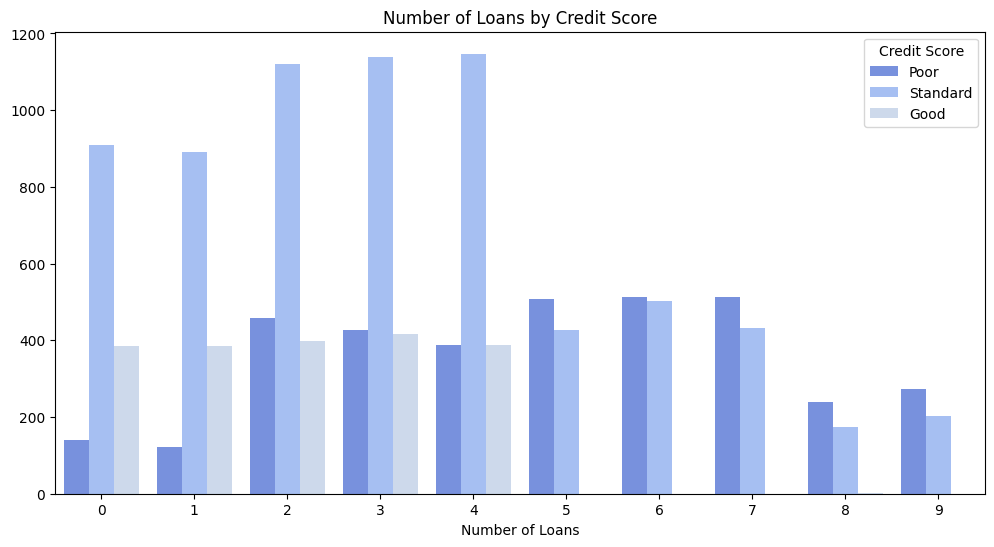

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=unique_customers, x='Num_of_Loan', hue='Credit_Score', 
             hue_order=['Poor', 'Standard', 'Good'])
plt.title('Number of Loans by Credit Score')
plt.legend(title='Credit Score')
plt.ylabel('')
plt.xlabel('Number of Loans')
plt.show()


This trend suggests that having a high number of loans is often associated with lower credit scores (Poor or Standard), which may reflect financial stress or a history of borrowing that affects credit score.

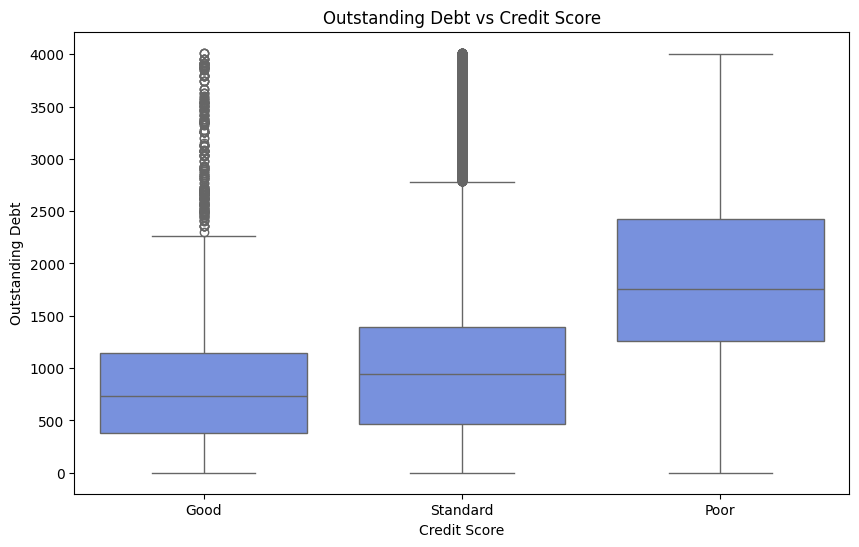

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_Score', y='Outstanding_Debt', data=df)

plt.title('Outstanding Debt vs Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Outstanding Debt')
plt.show()

The box plot shows that individuals with Poor credit scores have the highest outstanding debt, with a wide range and high median, indicating a consistently high debt burden among them. On the other hand, individuals with Good credit scores maintain the lowest outstanding debts, but they exhibit numerous outliers. These outliers suggest that while most people with good credit effectively manage their debts, a few still carry significantly high debt, highlighting that good credit does not always mean completely debt-free.

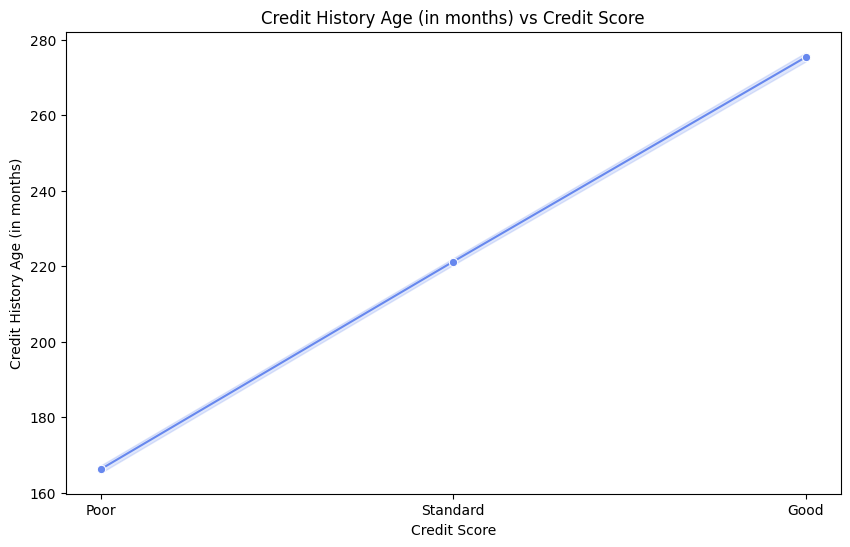

In [ ]:
score_order = ['Poor', 'Standard', 'Good']
df['Credit_Score'] = pd.Categorical(df['Credit_Score'], categories=score_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Credit_Score', y='Credit_History_Age_in_months' ,marker='o')

plt.title('Credit History Age (in months) vs Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Credit History Age (in months)')
plt.show()

The line graph illustrates a positive correlation between credit score and the age of credit history,
This suggests that a longer period of managing credit is associated with achieving a better credit score.

In [ ]:

"""
BaseEstimator, TransformerMixin: Inherits from scikit-learn base classes to make this compatible with scikit-learn pipelines.

BaseEstimator provides get_params() and set_params() methods, while TransformerMixin adds the fit_transform() method for easy chaining.
"""
# Convert Credit History Age String to Months
class CreditHistoryAgeToMonths(BaseEstimator, TransformerMixin):
    def __init__(self, column='Credit_History_Age', new_column_name='Credit_History_Age_in_months'):
        self.column = column
        self.new_column_name = new_column_name

    def fit(self, X, y=None):
        return self 

    def transform(self, X):
        X = X.copy()
        if self.column not in X.columns:
            return X

        def to_months(x):
            if pd.isna(x):
                return np.nan
            try:
                s = str(x).strip()
                match = re.search(r'(\d+)\s*Years?\s*(?:and)?\s*(\d+)?\s*Months?', s, re.IGNORECASE)
                if match:
                    years = int(match.group(1)) if match.group(1) else 0
                    months = int(match.group(2)) if match.group(2) else 0
                    return years * 12 + months
                match_years_only = re.search(r'(\d+)\s*Years?', s, re.IGNORECASE)
                if match_years_only:
                    years = int(match_years_only.group(1))
                    return years * 12
                match_months_only = re.search(r'(\d+)\s*Months?', s, re.IGNORECASE)
                if match_months_only:
                    months = int(match_months_only.group(1))
                    return months

            except Exception: # Catch potential errors during conversion
                pass # Return NaN if any error occurs
            return np.nan # Return NaN if no match or error

        # Use .loc for safer assignment
        X.loc[:, self.new_column_name] = X[self.column].apply(to_months)
        return X

# Clean numeric columns: Remove special characters and convert to numeric
class CleanNumeric(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Create a copy to avoid modifying the original data
        X = X.copy()

        # Apply cleaning to each specified column
        for c in self.columns:
            if c in X.columns:
                # Convert to string, remove special characters, and convert to numeric
                X[c] = pd.to_numeric(
                    X[c].astype(str).str.replace(r'[^0-9.]', '', regex=True),
                    errors='coerce' # handles empty and non-numeric data
                )
        return X

# Clean Category Strings
class CategoryCleaner(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for c in self.columns:
            if c in X.columns:
                # Ensure column is string type first
                X[c] = X[c].astype(str)
                # Apply cleaning steps
                X[c] = (
                    X[c]
                        .str.replace(r'[^A-Za-z\s]', '', regex=True)
                        .str.strip()
                        .str.replace(r'\s+', '_', regex=True)
                        .str.lower()
                        .replace(r'^_+$', np.nan, regex=True) # Handle cases that become only underscores ^start and end of string$
                        .replace(r'^\s*$', np.nan, regex=True) # Replace empty/whitespace-only with NaN
                        .replace('nan', np.nan) # Replace string 'nan' with NaN
                )
        return X

# Forward/backward fill by Customer_ID for static fields
class StaticFieldFiller(BaseEstimator, TransformerMixin):
    def __init__(self, columns, group_col='Customer_ID'):
        self.columns = columns
        self.group_col = group_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        # Check if group column exists
        if self.group_col not in X.columns:
            return X

        # Fill only the specified columns
        filled = X.groupby(self.group_col, group_keys=False)[self.columns].apply(lambda g: g.ffill().bfill())
        X[self.columns] = filled  # Update only the static columns

        return X

class LocalModeCatImputer(BaseEstimator, TransformerMixin):
    def __init__(self, columns, window=3):
        self.columns = columns
        self.window = window

    def fit(self, X, y=None):
        # No fitting required for this imputer as it works row-wise without prior statistics
        return self

    def local_mode_impute(self, series):
        # Replace 'nan' strings with actual NaNs
        series = series.replace('nan', np.nan)
        # Create a copy to avoid modifying original data
        data = series.copy()
        n = len(data)
        for i in range(n):
            # Check if the value is NaN
            if pd.isna(data.iloc[i]):
                # Define the local window
                start = max(0, i - self.window // 2)
                end = min(n, i + self.window // 2 + 1)
                window_values = data[start:i].tolist() + data[i+1:end].tolist()
                # Use mode as the local fill value, excluding NaNs
                if window_values:
                    mode_value = pd.Series([v for v in window_values if not pd.isna(v)]).mode()
                    if len(mode_value) > 0:
                        data.iloc[i] = mode_value[0]
        return data

    def transform(self, X):
        # Apply the local mode imputation for each specified column
        X = X.copy()
        for col in self.columns:
            X[col] = self.local_mode_impute(X[col])
        return X

class MixedCategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, ordinal_features=None, nominal_features=None):
        self.ordinal_features = ordinal_features or []
        self.nominal_features = nominal_features or []
        self.label_encoders_ = {}

    def fit(self, X, y=None):
        # Fit LabelEncoders on ordinal features
        for col in self.ordinal_features:
            le = LabelEncoder()
            le.fit(X[col].astype(str).unique())  # Fit only on unique non-null values
            self.label_encoders_[col] = le
        return self

    def transform(self, X):
        X = X.copy()

        # Apply Label Encoding to ordinal features
        for col in self.ordinal_features:
            if col in X.columns:
                le = self.label_encoders_[col]
                # Encode known values, use -1 for unseen values
                """ Lambda Function Logic:
                le.transform([val]):
                LabelEncoder requires a list as input, even for a single value
                This returns a NumPy array with a single encoded value
                [0]:
                Extracts the single integer from the returned array """
                X[col] = X[col].astype(str).apply(lambda val: le.transform([val])[0] if val in le.classes_ else -1)

        # Apply One-Hot Encoding to nominal features
        if self.nominal_features:
            X = pd.get_dummies(X, columns=self.nominal_features, dummy_na=True)

        return X

# Drop Specified Columns
# for features afrer transformation and not used featuer in model
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Ensure columns to drop actually exist
        cols_to_drop = [col for col in self.columns if col in X.columns]
        return X.drop(columns=cols_to_drop, errors='ignore')


# KNN and Z_score were not effecient bec of corrolation and bec of the data range for some feature we cannot use ordinal methods 
class MedianNumImputer(BaseEstimator, TransformerMixin):
    def __init__(self, columns, outlier_factor=1.5):
        self.columns = columns
        self.outlier_factor = outlier_factor
        self.medians_ = {}
        self.iqr_bounds_ = {}

    def fit(self, X, y=None):
        X_df = pd.DataFrame(X)
        for col in self.columns:
            Q1 = X_df[col].quantile(0.25)
            Q3 = X_df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - self.outlier_factor * IQR
            upper_bound = Q3 + self.outlier_factor * IQR
            self.iqr_bounds_[col] = (lower_bound, upper_bound)
            self.medians_[col] = X_df[col].median()
        return self

    def transform(self, X):
        X_df = pd.DataFrame(X).copy()
        for col in self.columns:
            if col in X_df.columns:
                median = self.medians_[col]
                lower, upper = self.iqr_bounds_[col]
                # Replace NaNs
                X_df[col] = X_df[col].fillna(median)
                # Replace outliers
                X_df[col] = X_df[col].mask((X_df[col] < lower) | (X_df[col] > upper), median)
        return X_df

class CorrelationFilter(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.1):
        self.threshold = threshold
        self.selected_features_ = []
        self.feature_names_in_ = None

    def fit(self, X, y):
        # Ensure input is a DataFrame
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)

        self.feature_names_in_ = X.columns

        # Calculate correlation with target for each column
        correlations = X.apply(lambda col: np.corrcoef(col, y)[0, 1]) # [0, 1] for first row in cor matrix 
        abs_correlations = correlations.abs()

        # Select features with correlation above threshold
        self.selected_features_ = abs_correlations[abs_correlations >= self.threshold].index.tolist()
        return self

    def transform(self, X):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.feature_names_in_)
        return X[self.selected_features_]

    def get_feature_names_out(self, input_features=None):
        return np.array(self.selected_features_)

class RoundDecimals(BaseEstimator, TransformerMixin):
    def __init__(self, decimals=2):
        self.decimals = decimals

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_rounded = X.copy()
        if isinstance(X_rounded, pd.DataFrame):
            X_rounded = X_rounded.round(self.decimals)
        else:
            X_rounded = np.round(X_rounded, self.decimals)
        return X_rounded

class DebugColumns(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X


In [7]:
# --- Pipeline Definition ---

initial_numeric_cols = [
    "Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts",
    "Num_Credit_Card", "Interest_Rate", "Num_of_Loan", "Delay_from_due_date",
    "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Num_Credit_Inquiries",
    "Outstanding_Debt", "Total_EMI_per_month", "Amount_invested_monthly",
    "Monthly_Balance", "Credit_Utilization_Ratio"
]
static_cols = ["Age","Occupation","Annual_Income","Monthly_Inhand_Salary","Num_Bank_Accounts","Num_Credit_Card","Interest_Rate"]
cat_clean_cols = ['Credit_Mix','Payment_Behaviour','Occupation','Payment_of_Min_Amount','Month']
cat_impute_cols = ['Credit_Mix','Payment_Behaviour','Occupation','Payment_of_Min_Amount','Month']
cat_encode_cols = ['Credit_Mix','Payment_Behaviour','Occupation','Payment_of_Min_Amount','Month']
num_impute_cols = initial_numeric_cols + ['Credit_History_Age_in_months']
ordinal_features = ['Credit_Mix', 'Payment_of_Min_Amount', 'Month']
nominal_features = ['Occupation', 'Payment_Behaviour']
cols_to_drop = ['Name','Type_of_Loan','ID','SSN', 'Credit_History_Age', 'Customer_ID']

In [ ]:
# Create a pre-knn pipeline to extract column names
preprocessor = Pipeline([
    ('credit_age_months', CreditHistoryAgeToMonths(column='Credit_History_Age', new_column_name='Credit_History_Age_in_months')),
    ('clean_numeric', CleanNumeric(columns=initial_numeric_cols)),
    ('fill_static', StaticFieldFiller(columns=static_cols, group_col='Customer_ID')),
    ('clean_cats', CategoryCleaner(columns=cat_clean_cols)),
    ('impute_cat_mode', LocalModeCatImputer(columns=cat_impute_cols)),
    ('encode', MixedCategoricalEncoder(ordinal_features=ordinal_features, nominal_features=nominal_features)),
    ('drop_cols', DropColumns(columns=cols_to_drop)),
    # ('knn_imputer', KNNImputer(n_neighbors=5)),
    # ('debug_columns', DebugColumns()),
    # ('imputer', SimpleImputer(strategy='median')),
    ('median_num_imputer', MedianNumImputer(columns=num_impute_cols)),
    ('debug_columns', DebugColumns()),
    # ('cap_outliers', OutlierCapper(columns=num_impute_cols, factor=1.5)),
    # ('to_df2', ArrayToDataFrame(columns=column_names)),
    # ('scaler', StandardScaler()),
    # ('pca', PCA(n_components=0.95)),
])
X_preprocessed = preprocessor.fit_transform(X_train, y_train)


In [10]:
X_preprocessed.describe()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_in_months
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,3.502413,33.352787,48176.281629,3992.522685,5.371825,5.518125,14.471937,3.503687,19.420112,13.375375,10.271850,5.778525,1.152775,1244.451409,32.285619,1.402175,88.453613,152.859981,354.733645,221.112925
std,2.292163,10.618473,34751.114632,2877.310257,2.577165,2.045819,8.658509,2.394621,12.590903,6.013530,6.357481,3.786859,0.811861,889.775938,5.113520,0.693802,79.958840,108.515286,135.361649,95.050777
min,0.000000,14.000000,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.000000,0.000000,0.000000,0.000000,0.007760,1.000000
25%,2.000000,25.000000,19514.520000,1630.701667,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.430000,3.000000,0.000000,565.040000,28.053517,1.000000,30.306460,77.287966,270.882500,154.000000
50%,4.000000,34.000000,37720.580000,3106.770833,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1.000000,1161.100000,32.303934,2.000000,69.288869,135.976763,336.862932,219.000000
75%,6.000000,41.000000,68900.640000,5728.215000,7.000000,7.000000,20.000000,5.000000,26.000000,18.000000,14.310000,8.000000,2.000000,1590.400000,36.499460,2.000000,125.015508,186.162204,413.487849,292.000000
max,7.000000,56.000000,152947.120000,12474.846667,11.000000,11.000000,34.000000,9.000000,55.000000,28.000000,29.040000,17.000000,2.000000,3997.220000,49.064277,2.000000,358.860197,553.882944,771.137605,404.000000


In [11]:
X_preprocessed.isna().sum()

Month                                             0
Age                                               0
Annual_Income                                     0
Monthly_Inhand_Salary                             0
Num_Bank_Accounts                                 0
Num_Credit_Card                                   0
Interest_Rate                                     0
Num_of_Loan                                       0
Delay_from_due_date                               0
Num_of_Delayed_Payment                            0
Changed_Credit_Limit                              0
Num_Credit_Inquiries                              0
Credit_Mix                                        0
Outstanding_Debt                                  0
Credit_Utilization_Ratio                          0
Payment_of_Min_Amount                             0
Total_EMI_per_month                               0
Amount_invested_monthly                           0
Monthly_Balance                                   0
Credit_Histo

In [12]:
# Combine X_train and y_train to compute correlation
Xy_train = X_preprocessed.copy()
Xy_train['Credit_Score'] = y_train

# Encode target variable for correlation
mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}
Xy_train['Credit_Score'] = Xy_train['Credit_Score'].map(mapping)

# Compute correlation matrix and sort by correlation with target
correlations = Xy_train.corr()['Credit_Score'].abs().sort_values(ascending=False)

# Print the correlations
print(correlations)

Credit_Score                                      1.000000
Interest_Rate                                     0.479234
Num_Credit_Inquiries                              0.427180
Delay_from_due_date                               0.404607
Outstanding_Debt                                  0.399225
Num_Credit_Card                                   0.398452
Num_Bank_Accounts                                 0.385302
Credit_History_Age_in_months                      0.370454
Num_of_Delayed_Payment                            0.355078
Num_of_Loan                                       0.350292
Payment_of_Min_Amount                             0.277734
Annual_Income                                     0.193118
Monthly_Inhand_Salary                             0.189271
Monthly_Balance                                   0.170128
Changed_Credit_Limit                              0.168166
Age                                               0.158084
Credit_Mix                                        0.1364

In [13]:
y_train.isna().sum()

np.int64(0)

In [14]:
from sklearn.feature_selection import SelectKBest , chi2 , f_classif

# Apply Anova
anova_selector = SelectKBest(f_classif , k='all')
X_anova = anova_selector.fit_transform(X_preprocessed , y_train)
anova_scores = pd.Series(anova_selector.scores_ , index=X_preprocessed.columns).sort_values(ascending=False)
anova_scores

d:\University\Semester 6\Data Computation\Project\Credit-Score-Classification\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [35 42] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
d:\University\Semester 6\Data Computation\Project\Credit-Score-Classification\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Interest_Rate                                     11931.601460
Num_Credit_Inquiries                               9078.228052
Outstanding_Debt                                   8151.843846
Delay_from_due_date                                7836.630666
Num_Credit_Card                                    7551.977889
Num_Bank_Accounts                                  7297.747688
Credit_History_Age_in_months                       6362.407804
Num_of_Delayed_Payment                             6323.466085
Num_of_Loan                                        5651.465429
Payment_of_Min_Amount                              3928.419735
Credit_Mix                                         3032.736652
Changed_Credit_Limit                               2105.925734
Annual_Income                                      1549.556891
Monthly_Inhand_Salary                              1486.583963
Monthly_Balance                                    1218.489588
Age                                                1032

In [ ]:
# List of top 16 features based on ANOVA F-values
top_features = [
    'Interest_Rate',
    'Num_Credit_Inquiries',
    'Delay_from_due_date',
    'Outstanding_Debt',
    'Num_Credit_Card',
    'Num_Bank_Accounts',
    'Credit_History_Age_in_months',
    'Num_of_Delayed_Payment',
    'Num_of_Loan',
    'Payment_of_Min_Amount'
]


# Select these columns from Xy_train
Xy_top = Xy_train[top_features]


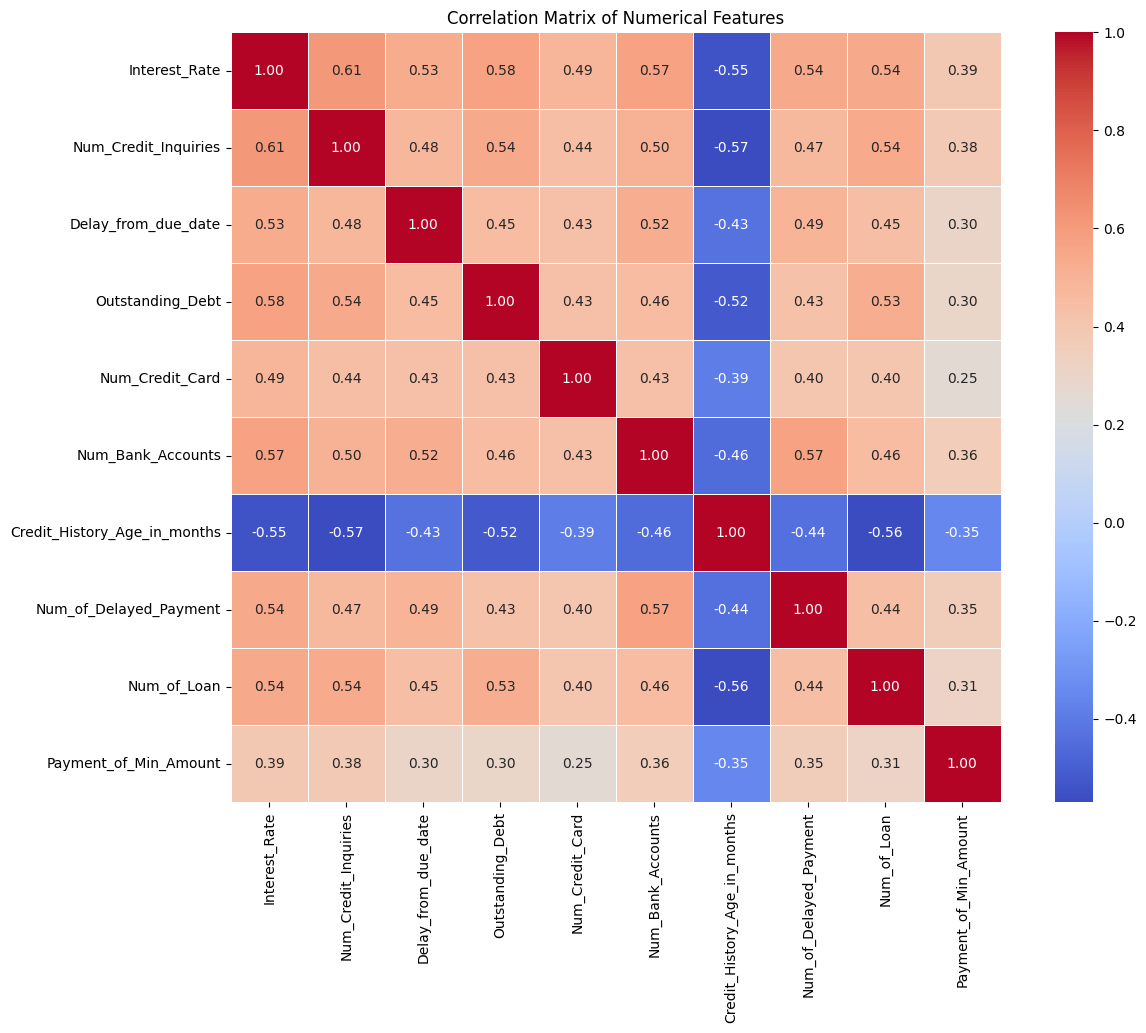

In [ ]:
correlation_matrix = Xy_top.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [17]:
cols_to_drop2 = [col for col in Xy_train.columns if col not in top_features]

In [18]:
full_pipeline = Pipeline([
    *preprocessor.steps,
    ('drop_cols_2', DropColumns(columns=cols_to_drop2)),
    ('scaler', StandardScaler()),
    ('pca', PCA(random_state=42)),
    ('rounder', RoundDecimals(decimals=1)),
    ('svc', SVC(random_state=42))
])

In [19]:
full_pipeline

Pipeline(steps=[('credit_age_months', CreditHistoryAgeToMonths()),
                ('clean_numeric',
                 CleanNumeric(columns=['Age', 'Annual_Income',
                                       'Monthly_Inhand_Salary',
                                       'Num_Bank_Accounts', 'Num_Credit_Card',
                                       'Interest_Rate', 'Num_of_Loan',
                                       'Delay_from_due_date',
                                       'Num_of_Delayed_Payment',
                                       'Changed_Credit_Limit',
                                       'Num_Credit_Inquiries',
                                       'Outstanding_Debt',
                                       'Total_EMI_per_month...
                                      'Occupation_teacher', 'Occupation_writer',
                                      'Occupation_nan',
                                      'Payment_Behaviour_highspentlargevaluepayments',
                                      'Payment_Behaviour_highspentmediumvaluepayments',
                                      'Payment_Behaviour_highspentsmallvaluepayments',
                                      'Payment_Behaviour_lowspentlargevaluepayments', ...])),
                ('scaler', StandardScaler()), ('pca', PCA(random_state=42)),
                ('rounder', RoundDecimals(decimals=1)),
                ('svc', SVC(random_state=42))])

# SVM

In [20]:
X_train_sample = X_train[:10000]
y_train_sample = y_train[:10000]

In [21]:
# Define the parameter grid
kernel_options = ['linear', 'rbf']
C_values = [0.1, 1, 10]
gamma_values = ['scale', 'auto', 1]
n_components = [6, 8]

param_grid = {
    'pca__n_components': n_components,
    'svc__kernel': kernel_options,
    'svc__C': C_values,
    'svc__gamma': gamma_values
}

# Perform grid search
grid_search = GridSearchCV(full_pipeline, param_grid, cv=5, scoring='f1_macro',n_jobs=5, verbose=3)
grid_search.fit(X_train_sample, y_train_sample)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)
print(f"Best F1 Macro Score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'pca__n_components': 8, 'svc__C': 10, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'}
Best F1 Macro Score: 0.6252


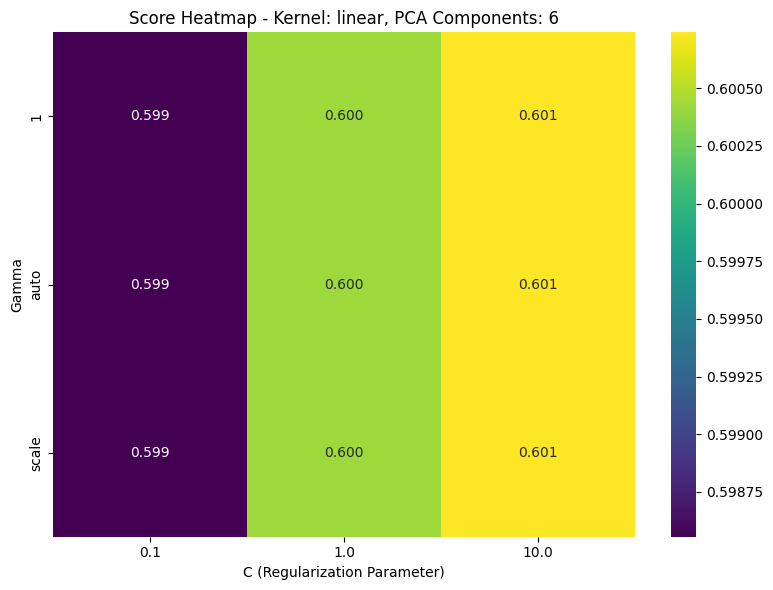

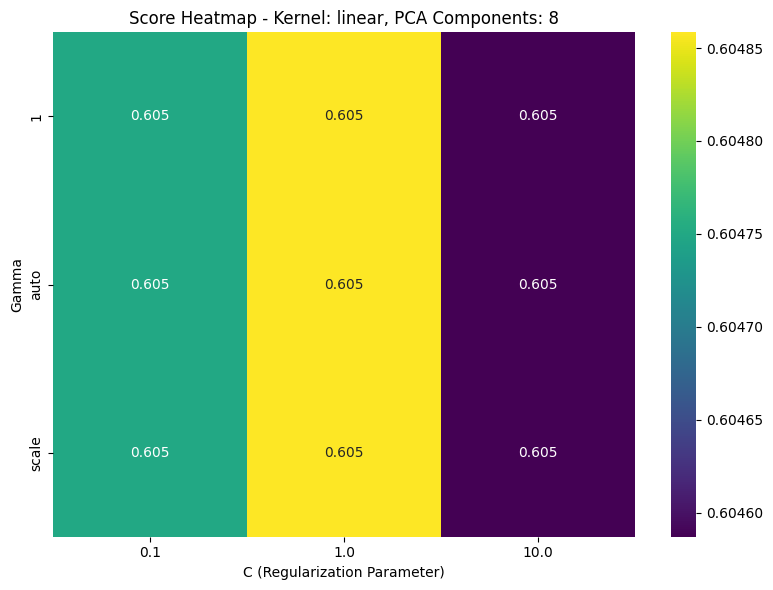

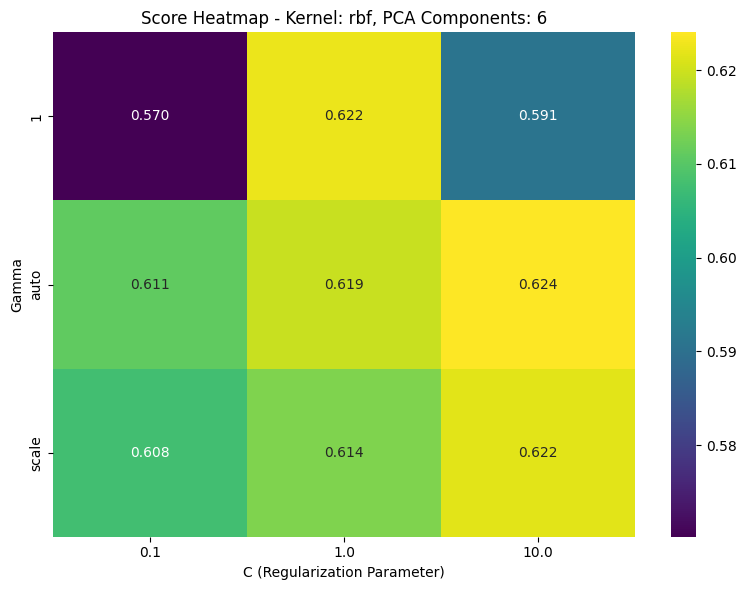

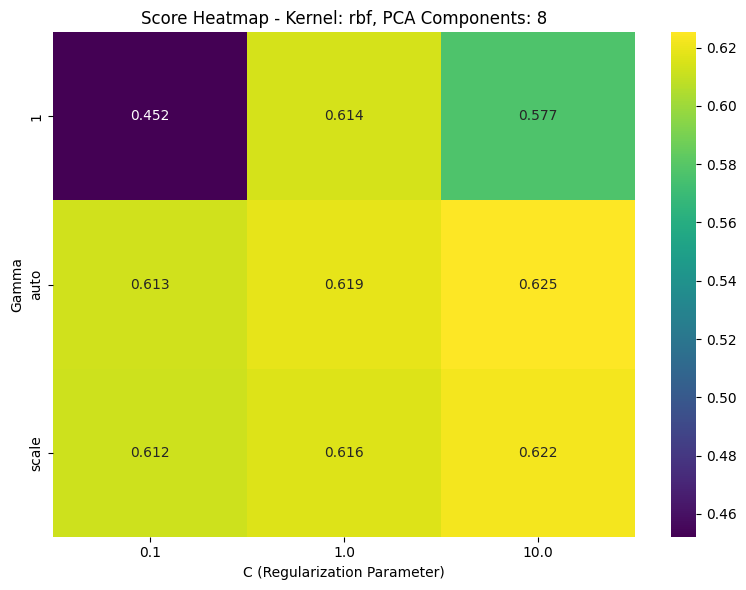

In [26]:
# Extract results from GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)

# Heatmap for mean test score across C and gamma for each kernel type and PCA n_components
for kernel in results['param_svc__kernel'].unique():
    for n_components in results['param_pca__n_components'].unique():
        subset = results[
            (results['param_svc__kernel'] == kernel) &
            (results['param_pca__n_components'] == n_components)
        ]
        if subset.empty:
            continue

        pivot_table = subset.pivot_table(
            index='param_svc__gamma',
            columns='param_svc__C',
            values='mean_test_score'
        )

        plt.figure(figsize=(8, 6))
        sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="viridis")
        plt.title(f"Score Heatmap - Kernel: {kernel}, PCA Components: {n_components}")
        plt.xlabel("C (Regularization Parameter)")
        plt.ylabel("Gamma")
        plt.tight_layout()
        plt.show()


In [27]:
# Fit actual model with best parameters
best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Good       0.58      0.53      0.55      3527
        Poor       0.67      0.68      0.68      5874
    Standard       0.70      0.72      0.71     10599

    accuracy                           0.67     20000
   macro avg       0.65      0.64      0.65     20000
weighted avg       0.67      0.67      0.67     20000



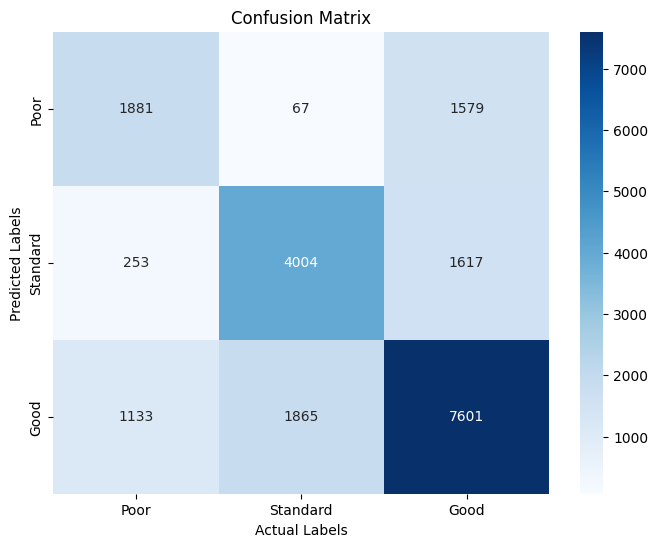

In [28]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
class_names = ['Poor', 'Standard','Good']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.show()

In [29]:
import pickle

# Save the trained XGBoost model (or pipeline + gridsearch)
with open('svc.pkl', 'wb') as file:
    pickle.dump(best_model, file)